In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [2]:
gender_submission = pd.read_csv("gender_submission.csv")

In [3]:
test_df=pd.read_csv("test.csv")
test_df.shape[0]

418

In [4]:
train_df=pd.read_csv("train.csv")
train_df.shape[0]

891

In [5]:
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [6]:
train_df.isnull().sum()#Where the Nan values to replace them

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df['Age'].median()#We are going to replace the missing Age by the median Age

28.0

In [8]:
train=train_df.copy()#We make a copy to not transform the original one

In [9]:
#We replace all the missing Age by the median age

In [10]:
train['Age'].fillna(train['Age'].median(), inplace=True)

In [11]:
train.drop('Cabin', axis=1, inplace=True) #we don't have enought information and it is not a  relevant column to study the 'cabin'

In [12]:
train_df['Embarked'].value_counts()#2 values are missing so we replace them with the port with the biggest value

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
#We replace all the embarked by the embarked port with the biggest value

In [14]:
train['Embarked'].fillna('S', inplace=True)

In [15]:
#We replace binary non numerical value by binary numerical

In [16]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

In [17]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,Q


In [18]:
train.drop('Name',  axis=1, inplace=True)
train.drop('Ticket', axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)
# those are not relevant columns to study 

In [19]:
train['Alone']=np.where((train["SibSp"]+train["Parch"])>0, 0, 1)
train.drop('SibSp', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)
#Those column means the "same" 

In [20]:
#We replace non binary non numerical value by binary non numerical

In [21]:
trained=pd.get_dummies(train, columns=["Embarked"])
trained.head(10) 


,Survived,Pclass,Sex,Age,Fare,Alone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,0,False,False,True
1,1,1,1,38.0,71.2833,0,True,False,False
2,1,3,1,26.0,7.9250,1,False,False,True
3,1,1,1,35.0,53.1000,0,False,False,True
4,0,3,0,35.0,8.0500,1,False,False,True
5,0,3,0,28.0,8.4583,1,False,True,False
6,0,1,0,54.0,51.8625,1,False,False,True
7,0,3,0,2.0,21.0750,0,False,False,True
8,1,3,1,27.0,11.1333,0,False,False,True
9,1,2,1,14.0,30.0708,0,True,False,False


In [22]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
test_df['Age'].median()

27.0

In [24]:
test=test_df.copy()#We make a copy to not transform the original one

In [25]:
#We do the same transformation we have done on train on test

In [26]:
test['Age'].fillna(test['Age'].median(), inplace=True)

In [27]:
test.drop('Cabin', axis=1, inplace=True)

In [28]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [29]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [30]:
test.drop('Name',  axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [31]:
test['Alone']=np.where((test["SibSp"]+test["Parch"])>0, 0, 1)
test.drop('SibSp', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)

In [32]:
tested=pd.get_dummies(test, columns=["Embarked"])
tested.head(10)

,Pclass,Sex,Age,Fare,Alone,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,7.8292,1,False,True,False
1,3,1,47.0,7.0000,0,False,False,True
2,2,0,62.0,9.6875,1,False,True,False
3,3,0,27.0,8.6625,1,False,False,True
4,3,1,22.0,12.2875,0,False,False,True
5,3,0,14.0,9.2250,1,False,False,True
6,3,1,30.0,7.6292,1,False,True,False
7,2,0,26.0,29.0000,0,False,False,True
8,3,1,18.0,7.2292,1,True,False,False
9,3,0,21.0,24.1500,0,False,False,True


In [33]:
#Now that i have my data clean i will make my  exploratory data analysis

In [34]:
trained['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

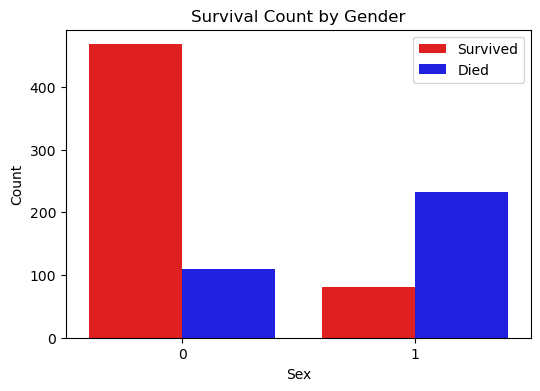

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=trained, palette={0: "red", 1: "blue"})#survided:1 dead:0
plt.legend(['Survived', 'Died'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.show()

Text(0.5, 1.0, 'Survival Density by Age')

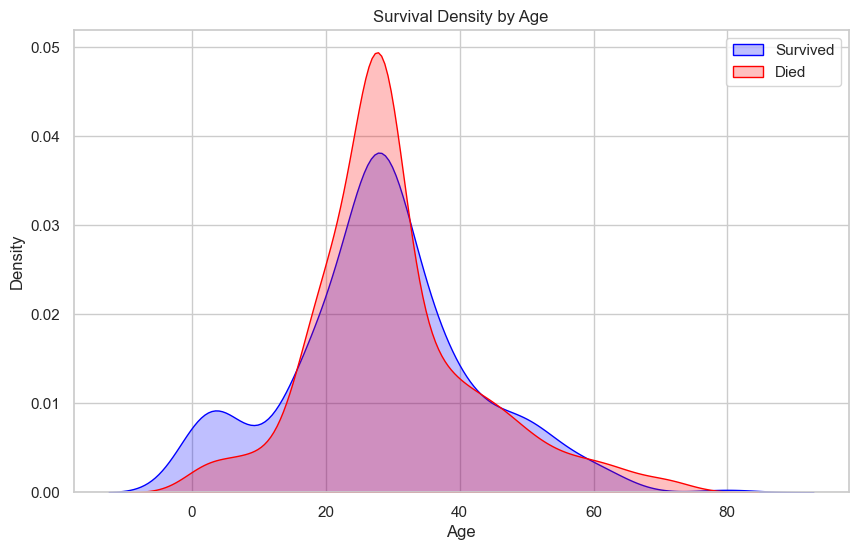

In [36]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  
sns.kdeplot(data=trained, x="Age", hue="Survived", common_norm=False, fill=True, palette={0: "red", 1: "blue"})
plt.legend(['Survived', 'Died'])
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Survival Density by Age")

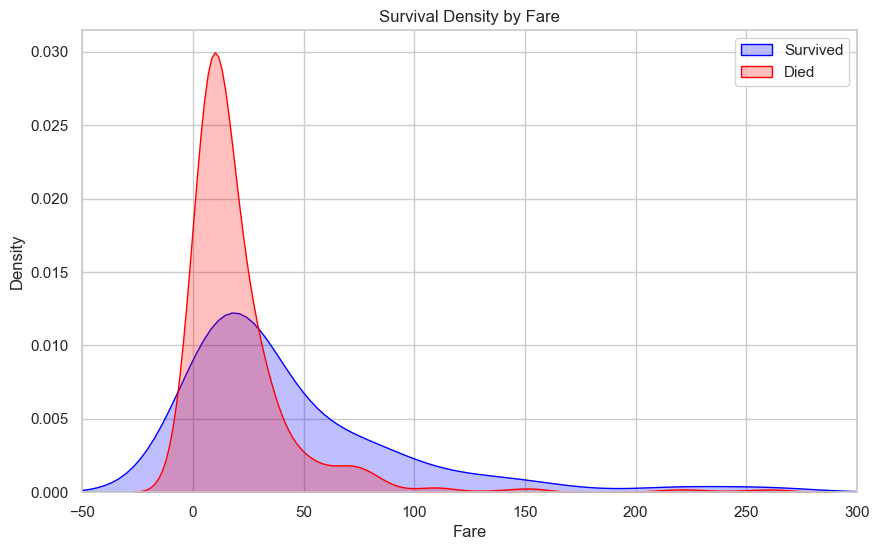

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.kdeplot(data=trained, x="Fare", hue="Survived", common_norm=False, fill=True, palette={0: "red", 1: "blue"})
plt.legend(['Survived', 'Died'])
plt.xlabel("Fare")
plt.ylabel("Density")
plt.title("Survival Density by Fare")
plt.xlim(-50,300)
plt.show()

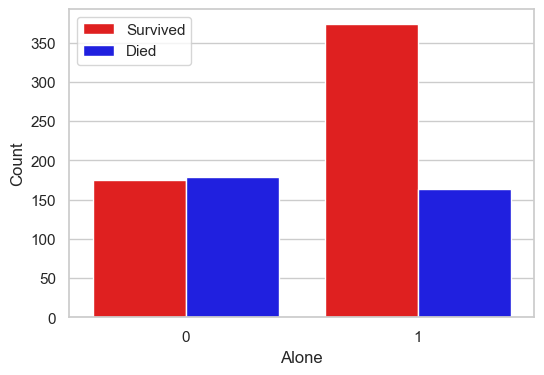

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Alone', hue='Survived', data=trained, palette={0: "red", 1: "blue"})#survided:1 dead:0
plt.legend(['Survived', 'Died'])
plt.xlabel("Alone")
plt.ylabel("Count")
plt.show()

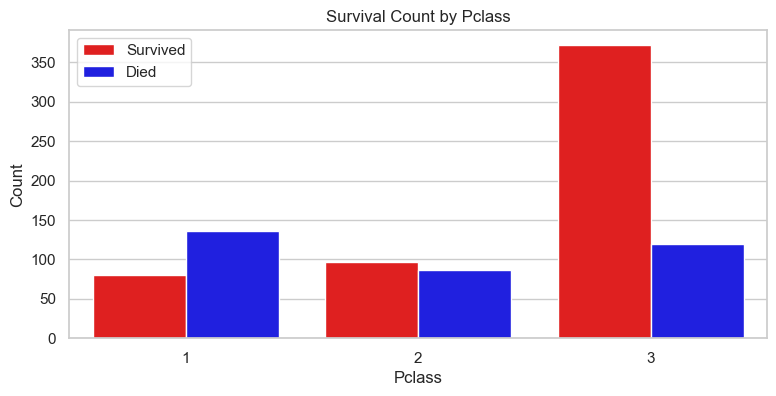

In [39]:
plt.figure(figsize=(9, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette={0: "red", 1: "blue"})#survided:1 dead:0
plt.legend(['Survived', 'Died'])
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Survival Count by Pclass")
plt.show()

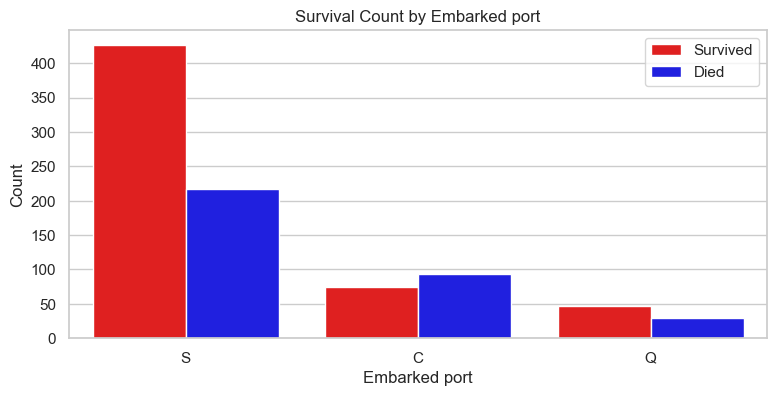

In [40]:
plt.figure(figsize=(9, 4))
sns.countplot(x='Embarked', hue='Survived', data=train_df, palette={0: "red", 1: "blue"})#survided:1 dead:0
plt.legend(['Survived', 'Died'])
plt.xlabel("Embarked port")
plt.ylabel("Count")
plt.title("Survival Count by Embarked port")
plt.show()

In [41]:
#We make a copy of the data set

In [42]:
#We train our model with all the train set then test it on the test set 

In [45]:
parametre = ["Age", "Alone", "Pclass", "Embarked_C", "Embarked_S", "Embarked_Q", "Sex"]

X_train = trained[parametre]
y_train = trained['Survived']

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

X_test = tested[parametre]
predictions = model.predict(X_test)

true_labels = gender_submission['Survived']
test_accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy on test set: {test_accuracy}")

Accuracy on test set: 0.9497607655502392


In [46]:
#We see what is the most accurate coeff to study

In [47]:
coefficients = model.coef_
for i, feature in enumerate(parametre):
    print(f"{feature}: {coefficients[0, i]}")

Age: -0.03298423393364901
Alone: 0.038045854518958644
Pclass: -1.1348138453118255
Embarked_C: 0.17486696983154915
Embarked_S: -0.32041080770845204
Embarked_Q: 0.14554250629683232
Sex: 2.502549386416925


In [48]:
#We try to obtimize the model by changing the hyper-parameter 

In [49]:
#Max iter

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'] ,
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Meilleurs hyperparamètres : ", best_params)

best_model = grid_search.best_estimator_



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs hyperparamètres :  {'C': 0.1, 'solver': 'newton-cg'}


In [116]:
#random state

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Random_state: 0
Accuracy on test set: 0.9497607655502392


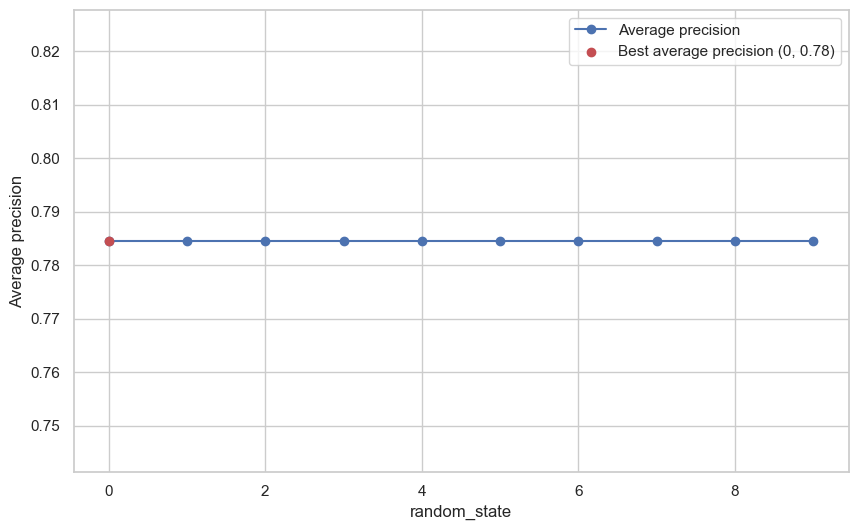

In [53]:

param_grid = {'random_state': range(0, 10)}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_random_state = grid_search.best_params_['random_state']
print(f"Best Random_state: {best_random_state}")

best_model = grid_search.best_estimator_
X_test = tested[parametre]
predictions = best_model.predict(X_test)

true_labels = gender_submission['Survived']
test_accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy on test set: {test_accuracy}")

results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(results['param_random_state'], results['mean_test_score'], marker='o', linestyle='-', color='b', label='Average precision')
plt.scatter(best_random_state, grid_search.best_score_, color='r', label=f"Best average precision ({best_random_state}, {grid_search.best_score_:.2f})", zorder=5)
plt.xlabel('random_state')
plt.ylabel('Average precision')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
parametre = ["Age", "Alone", "Pclass", "Embarked_C", "Embarked_S", "Embarked_Q", "Sex"]
model_2= LogisticRegression(max_iter=10000,random_state=0,C=0.1,solver='newton-cg')
model_2.fit(X_train, y_train)

X_test = tested[parametre]
predictions = model_2.predict(X_test)

true_labels = gender_submission['Survived']
test_accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy on test set: {test_accuracy}")

Accuracy on test set: 0.916267942583732


In [279]:
#the obtimization is a fail, the best model is still the first one

In [55]:
predictions = model.predict(X_test)

true_labels = gender_submission['Survived']
test_accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy on test set: {test_accuracy}")

Accuracy on test set: 0.9497607655502392


In [281]:
#We evaluate the model

Accuracy: 0.95
Confusion Matrix:
[[251  15]
 [  6 146]]
Precision: 0.91
Recall: 0.96
F1-Score: 0.93
AUC-ROC: 0.95


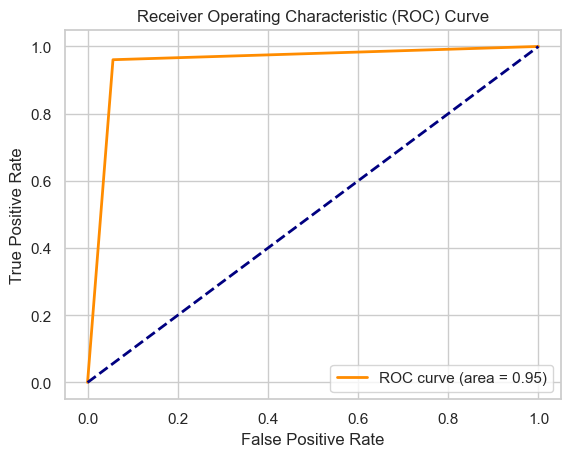

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

accuracy = accuracy_score(true_labels, predictions)
confusion_mat = confusion_matrix(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)


fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)


print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [59]:
import joblib
joblib.dump(model, 'titanic.pkl')

['titanic.pkl']